In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_df = pd.read_csv("C:/Users/Nihan Sayyed/Downloads/Car_Purchasing_Data.csv", encoding = 'ISO-8859-1')

In [3]:
car_df.head(5)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
X = car_df.drop(['Customer Name','Customer e-mail','Country','Car Purchase Amount'], axis = 1)

In [5]:
X.head(6)

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,42,62812.09301,11609.380910,238961.2505
1,0,41,66646.89292,9572.957136,530973.9078
2,1,43,53798.55112,11160.355060,638467.1773
3,1,58,79370.03798,14426.164850,548599.0524
4,1,57,59729.15130,5358.712177,560304.0671
5,1,57,68499.85162,14179.472440,428485.3604


In [6]:
X.tail(6)

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
494,0,52,77345.61633,6736.751680,665099.1390
495,0,41,71942.40291,6995.902524,541670.1016
496,1,38,56039.49793,12301.456790,360419.0988
497,1,54,68888.77805,10611.606860,764531.3203
498,1,59,49811.99062,14013.034510,337826.6382
499,1,47,61370.67766,9391.341628,462946.4924


In [7]:
y = car_df['Car Purchase Amount']

In [8]:
y.head(4)

0    35321.45877
1    45115.52566
2    42925.70921
3    67422.36313
Name: Car Purchase Amount, dtype: float64

In [9]:
X.shape

(500, 5)

In [10]:
y.shape

(500,)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.44      , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.42      , 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46      , 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.68      , 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78      , 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.54      , 0.51713347, 0.46690159, 0.45198622]])

In [12]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X_scaled,y_scaled,test_size = 0.3)

In [14]:

import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(40,input_dim = 5 ,activation = 'relu'))
model.add(Dense(40,activation = 'relu'))
model.add(Dense(1,activation='linear'))

In [15]:
model.compile(optimizer= 'adam',loss = 'mean_squared_error')

In [16]:
epochs_hist = model.fit(X_train,y_train,epochs= 20,batch_size= 50,verbose=1,validation_split=0.2)

Epoch 1/20
6/6 [==============================] - 2s 96ms/step - loss: 0.4438 - val_loss: 0.3516
Epoch 2/20
6/6 [==============================] - 0s 19ms/step - loss: 0.2748 - val_loss: 0.2035
Epoch 3/20
6/6 [==============================] - 0s 16ms/step - loss: 0.1517 - val_loss: 0.0977
Epoch 4/20
6/6 [==============================] - 0s 18ms/step - loss: 0.0707 - val_loss: 0.0371
Epoch 5/20
6/6 [==============================] - 0s 15ms/step - loss: 0.0296 - val_loss: 0.0186
Epoch 6/20
6/6 [==============================] - 0s 18ms/step - loss: 0.0230 - val_loss: 0.0186
Epoch 7/20
6/6 [==============================] - 0s 18ms/step - loss: 0.0223 - val_loss: 0.0160
Epoch 8/20
6/6 [==============================] - 0s 18ms/step - loss: 0.0176 - val_loss: 0.0125
Epoch 9/20
6/6 [==============================] - 0s 15ms/step - loss: 0.0136 - val_loss: 0.0121
Epoch 10/20
6/6 [==============================] - 0s 16ms/step - loss: 0.0127 - val_loss: 0.0121
Epoch 11/20
6/6 [============

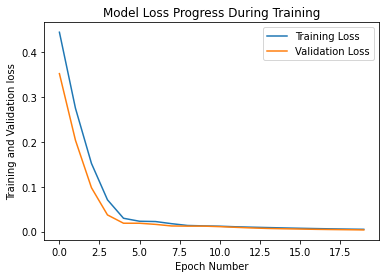

In [17]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation loss')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss','Validation Loss'])

In [18]:
# Gender, Age, Annual Salary, Credit Card Debt, Net Worth

X_Testing = np.array([[1, 50, 50000, 10985, 629312]])
y_predict = model.predict(X_Testing)
y_predict.shape
(1, 1)
print('Expected Purchase Amount=', y_predict[:,0])

1/1 [==============================] - 0s 188ms/step
Expected Purchase Amount= [196184.12]
